In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv('car_fuel_data.csv')




In [6]:
# Features and target
X = df[['engine_size', 'weight', 'speed']]
y = df['fuel_consumption']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [8]:
import numpy as np 
# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # [engine_size, weight, speed]

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")



Intercept: -0.014850762850926458
Coefficients: [ 4.98216829e+00  1.95071338e-03 -2.80954023e-02]
MAE: 0.3524345516221161
MSE: 0.17260347579582688
RMSE: 0.41545574468988494
R² Score: 0.995314233341723


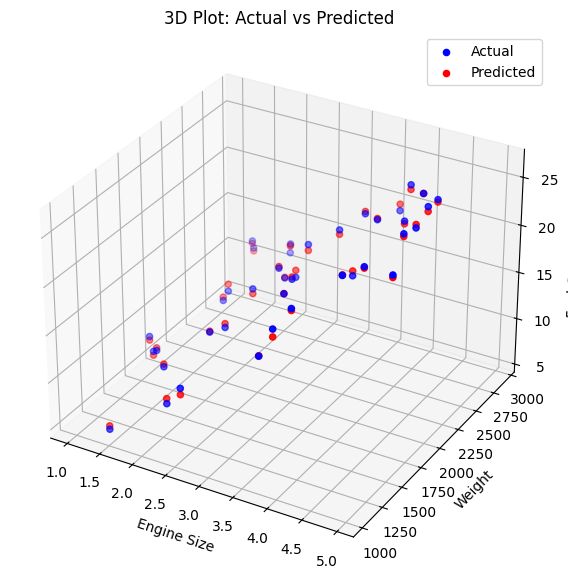

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['engine_size'], X_test['weight'], y_test, c='blue', label='Actual')
ax.scatter(X_test['engine_size'], X_test['weight'], y_pred, c='red', label='Predicted')

ax.set_xlabel('Engine Size')
ax.set_ylabel('Weight')
ax.set_zlabel('Fuel Consumption')
plt.legend()
plt.title("3D Plot: Actual vs Predicted")
plt.show()
